# Imports

In [1]:
from matplotlib import pyplot as plt
from utils import load_pickle, save_pickle, show_mel
import librosa
import numpy as np

import torch

In [23]:
n = '56' # Experiment number

## Loss Graphs

Initialising method and loading main dictionary

In [24]:
def plot_train_hist(train_hist, names, title, ylim=None, epoch=False):
    x = range(len(train_hist[names[0]]))

    plt.figure()
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    
    for n in names:
        
        if(epoch):
            # Specifically 420 since 1680/4. Batch size is 4, Max pairings is 1680
            x = range(len(train_hist[names[0]]) // 420)  
            epoch_wise_hist = []
            for i in range(0, len(train_hist[names[0]]), 420):
                epoch_wise_hist.append(train_hist[n][i])
            plt.plot(x, epoch_wise_hist, label=n)
        else:
            plt.plot(x, train_hist[n], label=n)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    if(ylim): plt.ylim(ylim)
    
train_hist = load_pickle('../pool/'+n+'/train_hist.pickle')

### Generator A2B Path

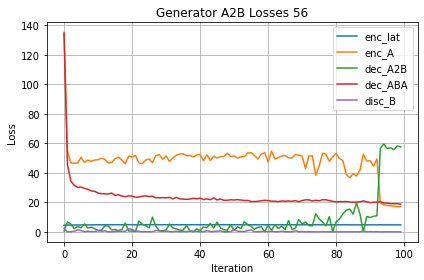

In [25]:
plot_train_hist(train_hist, ['enc_lat', 'enc_A', 'dec_A2B', 'dec_ABA', 'disc_B'], 'Generator A2B Losses '+n, epoch=True)

### Generator B2A Path

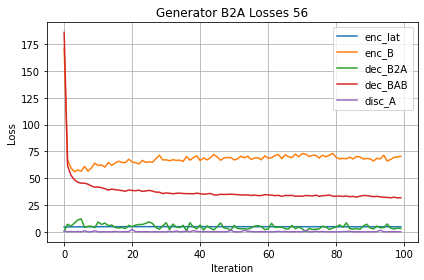

In [26]:
plot_train_hist(train_hist, ['enc_lat', 'enc_B', 'dec_B2A', 'dec_BAB', 'disc_A'], 'Generator B2A Losses '+n, epoch=True)

### Discriminators A and B

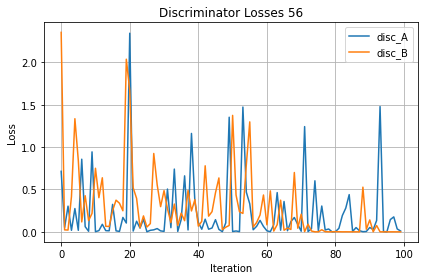

In [27]:
plot_train_hist(train_hist, ['disc_A', 'disc_B'], 'Discriminator Losses '+n, epoch=True)

# Evaluating via PSNR and SSIM

Showing all results of experiments of interest that were computed on the test set in evaluate.py. Note that PSNR and SSIM measure reconstruction. This is partly linked to the main task and may indicate better performance - but empirically.

In [2]:
import numpy as np

def compare_avg(expids, metric, direction):
    for i in expids:
        result = np.load('../pool/'+i+'/test_'+direction+'/'+metric+'.npy')
        print(i, np.mean(result))
    return

In [3]:
expids = ['54','56','62','63','58','59']

In [4]:
print('===== Metric for A2B ======')
print('=== Comparing PSNR:')
compare_avg(expids, 'psnr', 'A2B')
print('=== Comparing SSIM:')
compare_avg(expids, 'ssim', 'A2B')

===== Metric for A2B ======
=== Comparing PSNR:
54 12.541621122702251
56 12.657143583300266
62 12.960814332146306
63 12.79809238487796
58 11.96781372653246
59 10.082085873817721
=== Comparing SSIM:
54 0.39192804084955507
56 0.37503964551099495
62 0.4281419285608628
63 0.3962534713799555
58 0.3190166782537505
59 0.16573724584262187


In [5]:
print('===== Metric for B2A ======')
print('=== Comparing PSNR:')
compare_avg(expids, 'psnr', 'B2A')
print('=== Comparing SSIM:')
compare_avg(expids, 'ssim', 'B2A')

===== Metric for B2A ======
=== Comparing PSNR:
54 11.025460853255138
56 11.167672549683873
62 11.90990639068403
63 11.481441366731028
58 11.577999969969241
59 8.753434196487701
=== Comparing SSIM:
54 0.396845238489123
56 0.39526251501990045
62 0.4794704660635635
63 0.42589900654756496
58 0.44109759722392267
59 0.1541311558960559


Computing average between B2A and A2B

In [7]:
def compare_avg_both(expids, metric):
    for i in expids:
        result_B2A = np.load('../pool/'+i+'/test_B2A/'+metric+'.npy')
        result_A2B = np.load('../pool/'+i+'/test_A2B/'+metric+'.npy')
        avg = (np.mean(result_B2A) + np.mean(result_A2B) ) / 2
        print(i, avg)
    return

In [8]:
print('===== Metric for B2A and A2B Avg ======')
print('=== Comparing PSNR:')
compare_avg_both(expids, 'psnr')
print('=== Comparing SSIM:')
compare_avg_both(expids, 'ssim')

===== Metric for B2A and A2B Avg ======
=== Comparing PSNR:
54 11.783540987978695
56 11.91240806649207
62 12.435360361415167
63 12.139766875804494
58 11.772906848250852
59 9.41776003515271
=== Comparing SSIM:
54 0.39438663966933907
56 0.3851510802654477
62 0.45380619731221317
63 0.4110762389637602
58 0.3800571377388366
59 0.15993420086933888


Notes from PSNR:
- logvar seems to subtley improve reconstruction for BCE and MSE (the opposite affect for WGAN)
- BCE achieves the best results
- MSE achieves the noisiest results (may be partly due to large hyperparameter, 55 also mode collapses)

Notes from SSIM:
- Barely any difference for logvar vs no logvar
- BCE best, MSE worst (again partly due to large hyperparameter)

Also generally, seems like a harder task to transfer B2A rather than A2B.